## Imoport the required libraries

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [2]:
import pandas as pd
import sklearn
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

from skopt import BayesSearchCV

from wordcloud import WordCloud,STOPWORDS
import numpy as np
import tensorflow as tf

import pickle
import re
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB


from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D, GRU
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from transformers import TFBertForSequenceClassification
from transformers import BertTokenizer


# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from warnings import filterwarnings
filterwarnings("ignore")

2022-11-06 20:38:13.130874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 20:38:13.131912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 20:38:13.133028: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 20:38:13.133817: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-06 20:38:13.134614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

## Read the dataset

In [3]:
data = pd.read_csv('../input/mental-data/Mental_classes_data.csv', index_col='id')
data.head()

,location,tweetcreatedts,text,class
id,,,,
1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal


## Check the data quality

In [4]:
#find duplicate rows across all columns
print('Number of the duplicated rows= ',data.duplicated().sum())
data = data.drop_duplicates()
print('Number of the duplicated rows after dropping the duplicated rows= ',data.duplicated().sum())

# summary of the number of nulls
print('Total missing values = ', data.isna().sum().sum())

print('Number of nulls in each column:')
data.isna().sum()
print('________________________________________________________________')

# count the ratio of missing values
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)
data

Number of the duplicated rows=  7763
Number of the duplicated rows after dropping the duplicated rows=  0
Total missing values =  10414
Number of nulls in each column:


location          10414
tweetcreatedts        0
text                  0
class                 0
dtype: int64

________________________________________________________________


,Total missing,% missing
location,10414,32.540699
tweetcreatedts,0,0.000000
text,0,0.000000
class,0,0.000000


,location,tweetcreatedts,text,class
id,,,,
1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...,...,...
7751,"Oklahoma, USA",2021-01-27 23:59:00+00:00,@undeervtuber That nervous about being there?,anxiety
8024,NaN,2021-02-12 20:46:01+00:00,@Adsavage11235 @x_Beast17_x @WWE @USA_Network ...,normal
8855,hogwarts,2021-02-12 20:46:01+00:00,RT @threenxq: The Korean light is so cheating ...,normal


<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='id'>

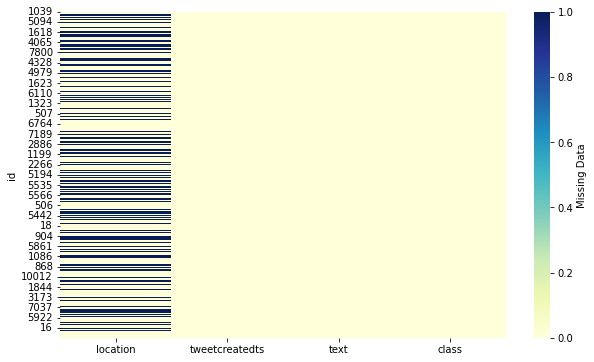

In [5]:
# visualize the heatmap of the missing values in the location column
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

## Make data exploration

In [6]:
# make new copy from the dataframe to make the exploration on
data_copy = data.copy()
data_copy

,location,tweetcreatedts,text,class
id,,,,
1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...,...,...
7751,"Oklahoma, USA",2021-01-27 23:59:00+00:00,@undeervtuber That nervous about being there?,anxiety
8024,NaN,2021-02-12 20:46:01+00:00,@Adsavage11235 @x_Beast17_x @WWE @USA_Network ...,normal
8855,hogwarts,2021-02-12 20:46:01+00:00,RT @threenxq: The Korean light is so cheating ...,normal


In [7]:
data_copy['class'].value_counts()

anxiety    10728
normal     10000
stress      6260
lonely      5015
Name: class, dtype: int64

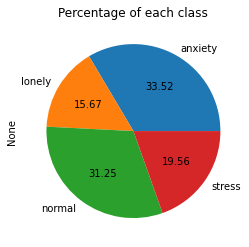

In [8]:
# visualize the percentage of each class by pie chart
plot = data_copy.groupby('class').size().plot.pie(autopct='%.2f', y='percentage', title='Percentage of each class')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over Entries')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

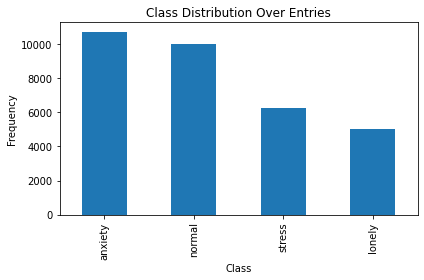

In [9]:
# visualize the frequency of each class
plt.figure()
ax = data_copy['class'].value_counts().plot(kind='bar')

ax.set_title('Class Distribution Over Entries')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# fill the null values in the location column with word 'other'
data_copy['location']=data_copy['location'].fillna('other')

In [11]:
data_copy['location'].value_counts()

other              10414
United States        262
she/her              236
Los Angeles, CA      167
California, USA      149
                   ...  
Mid-West               1
SHE¡THEY               1
19\She\Her             1
Carolina's             1
Doylestown, PA         1
Name: location, Length: 11404, dtype: int64

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='location', ylabel='count'>

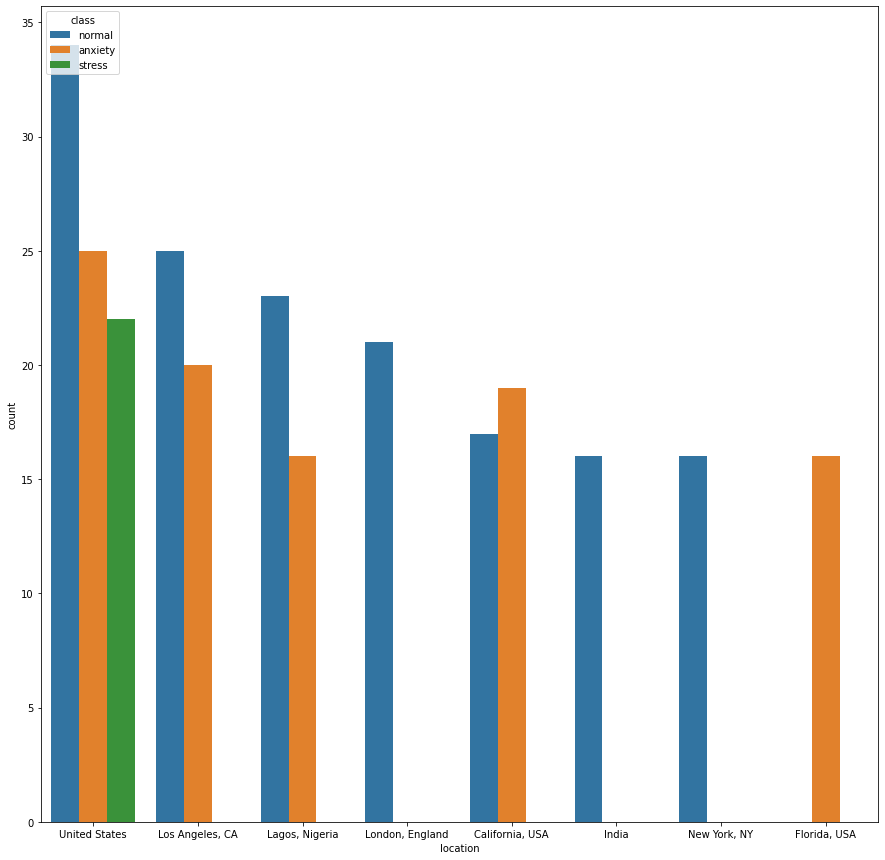

In [12]:
# visualize the most five countries have mental health problems
data_copy.drop(data_copy[(data_copy['location'] =='other') | (data_copy['location'] == 'she/her')].index, inplace=True)

count=data_copy[['location','class']].groupby(['class'])
fre=count['location'].value_counts()
tt=fre.reset_index(name='count')
tt=tt.sort_values(by='count',ascending=False).head(13)
plt.figure(figsize=(15,15))
sns.barplot(x=tt['location'], y=tt['count'],hue=tt['class'])
plt.savefig("distribution of classes over the most top countries have mental health problems.png", dpi=100)


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over United States')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

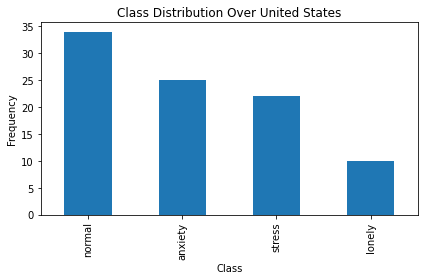

In [13]:
plt.figure()
ax =data_copy[data_copy['location']=='United States']['class'].value_counts().plot(kind='bar')
ax.set_title('Class Distribution Over United States')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [14]:
# convert the type of the tweetcreatedts column into datetime type
data_copy['tweetcreatedts']=pd.to_datetime(data_copy['tweetcreatedts'], format="%Y/%m/%d")
data_copy['tweetcreatedts']


id
1039   2021-02-08 19:07:40+00:00
1682   2021-02-03 23:58:40+00:00
934    2021-02-08 09:40:31+00:00
6144   2021-01-27 23:58:48+00:00
5406   2021-02-12 20:07:12+00:00
                  ...           
6326   2021-01-27 23:58:41+00:00
7361   2021-02-12 20:27:57+00:00
8444   2021-01-27 23:58:29+00:00
9173   2021-02-12 20:46:01+00:00
8855   2021-02-12 20:46:01+00:00
Name: tweetcreatedts, Length: 8099, dtype: datetime64[ns, UTC]

In [15]:
# split the year, month, and day from the date
data_copy['Year'] =data_copy['tweetcreatedts'].dt.year
data_copy['Month'] = data_copy['tweetcreatedts'].dt.month
data_copy['Day'] = data_copy['tweetcreatedts'].dt.day

In [16]:
# get the week number and the day name from the date column
data_copy['Week_Number'] = data_copy['tweetcreatedts'].dt.isocalendar().week
data_copy['day_name']=data_copy['tweetcreatedts'].dt.day_name()
data_copy

,location,tweetcreatedts,text,class,Year,Month,Day,Week_Number,day_name
id,,,,,,,,,
1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety,2021,2,8,6,Monday
1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely,2021,2,3,5,Wednesday
934,Kansas City,2021-02-08 09:40:31+00:00,"Twitter, help me out. I'm big on white noise, ...",anxiety,2021,2,8,6,Monday
6144,"Eugene, OR",2021-01-27 23:58:48+00:00,RT @venusized: why do humans need jobs why can...,lonely,2021,1,27,4,Wednesday
5406,773 • 941,2021-02-12 20:07:12+00:00,"RT @yungchipotle: when someone ghosts you, res...",normal,2021,2,12,6,Friday
...,...,...,...,...,...,...,...,...,...
6326,she/her • read carrd byf!,2021-01-27 23:58:41+00:00,"hello, is there anyone who order devil albums ...",lonely,2021,1,27,4,Wednesday
7361,"Chicago, IL",2021-02-12 20:27:57+00:00,Does all baby swiss grow up to be regular swis...,normal,2021,2,12,6,Friday
8444,🇲🇽,2021-01-27 23:58:29+00:00,@eunsooful yes but i also need to pay attentio...,anxiety,2021,1,27,4,Wednesday


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:xlabel='day_name', ylabel='count'>

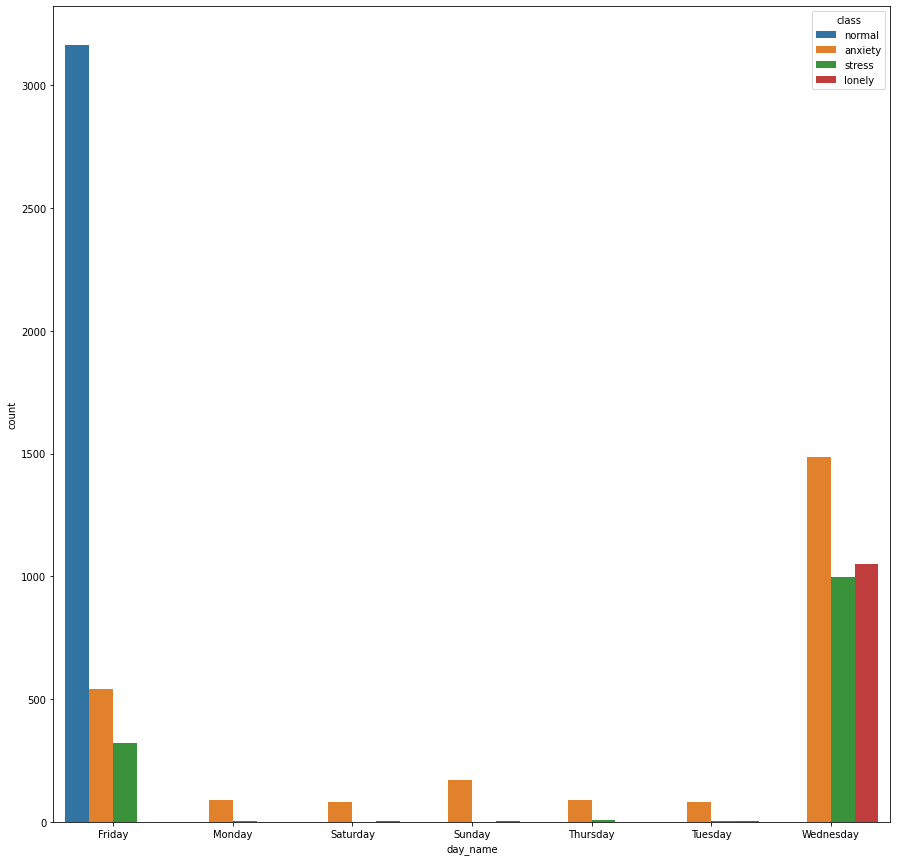

In [17]:
# visualize the days of the week that people suffer from mental health problems
week=data_copy[['day_name','class']].groupby(['day_name'])
new=week['class'].value_counts()
cc=new.reset_index(name='count')
plt.figure(figsize=(15,15))
sns.barplot(x=cc['day_name'], y=cc['count'],hue=cc['class'])

plt.savefig("distribution of classes over day of the week .png", dpi=100)

## Data preprocessing

In [18]:
data=data[['text','class']]
data

,text,class
id,,
1039,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,@SAD_istfied I'm gonna cry /pos,stress
6069,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...
7751,@undeervtuber That nervous about being there?,anxiety
8024,@Adsavage11235 @x_Beast17_x @WWE @USA_Network ...,normal
8855,RT @threenxq: The Korean light is so cheating ...,normal


In [19]:
# prepare the preprocessing function to clean the dataset
cachedStopWords = list(esw)
lemmatizer=WordNetLemmatizer()
#ps = PorterStemmer()

def lemmatize_article(sentence):
    sentence = word_tokenize(sentence)
    res = ''
    for word, tag in pos_tag(sentence):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        word = lemmatizer.lemmatize(word, wntag) if wntag else word
        res += word + ' '
    return res


def remove_stop_words(sentence):
    return ' '.join([word for word in sentence.split() if word not in cachedStopWords])
    
def remove_short(sentence):
    return ' '.join([word for word in sentence.split() if len(word) >= 3])
    
def remove_digits(sentence):
    return ' '.join([i for i in sentence.split() if not i.isdigit()])
    
def preprocess(all_texts):
    all_texts = list(map(lambda x: x.lower(), all_texts))
    all_texts = list(map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), all_texts))
    all_texts = list(map(lambda x: lemmatize_article(x), all_texts))
    all_texts = list(map(lambda x: x.strip(), all_texts))
    all_texts = list(map(lambda x: remove_stop_words(x), all_texts))
    all_texts = list(map(lambda x: remove_short(x), all_texts))
    all_texts = list(map(lambda x: remove_digits(x), all_texts))
    return all_texts

In [20]:
# remove the mentions and the urls from the text data
data['text'] = data['text'].str.replace(r'\s*@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*\B@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+\b', '', regex = True)
data['text'] = data['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
data


,text,class
id,,
1039,RT: I want to say a very big thank you to ever...,anxiety
1682,Done! I just need 320! Thanks for the chance!,lonely
5275,I'm gonna cry /pos,stress
6069,RT: I need a consistent fuck buddy,anxiety
6087,RT: glad we're finally talking about Deshaun a...,normal
...,...,...
7751,That nervous about being there?,anxiety
8024,They said unity pal,normal
8855,RT: The Korean light is so cheating,normal


In [21]:
# apply the preprocessing function on the data
data['text'] = preprocess(data['text'])
data

,text,class
id,,
1039,want say big thank single reach just make sure...,anxiety
1682,just need thanks chance,lonely
5275,gon,stress
6069,need consistent fuck buddy,anxiety
6087,glad finally talk deshaun denver loud,normal
...,...,...
7751,nervous,anxiety
8024,say unity pal,normal
8855,korean light cheating,normal


In [22]:
data = pd.DataFrame(data)
data.head()

,text,class
id,,
1039,want say big thank single reach just make sure...,anxiety
1682,just need thanks chance,lonely
5275,gon,stress
6069,need consistent fuck buddy,anxiety
6087,glad finally talk deshaun denver loud,normal


### Visualize the most repeated words in each class

<Figure size 2880x4320 with 0 Axes>

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'lonely')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'normal')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'anxiety')

<AxesSubplot:>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'stress')

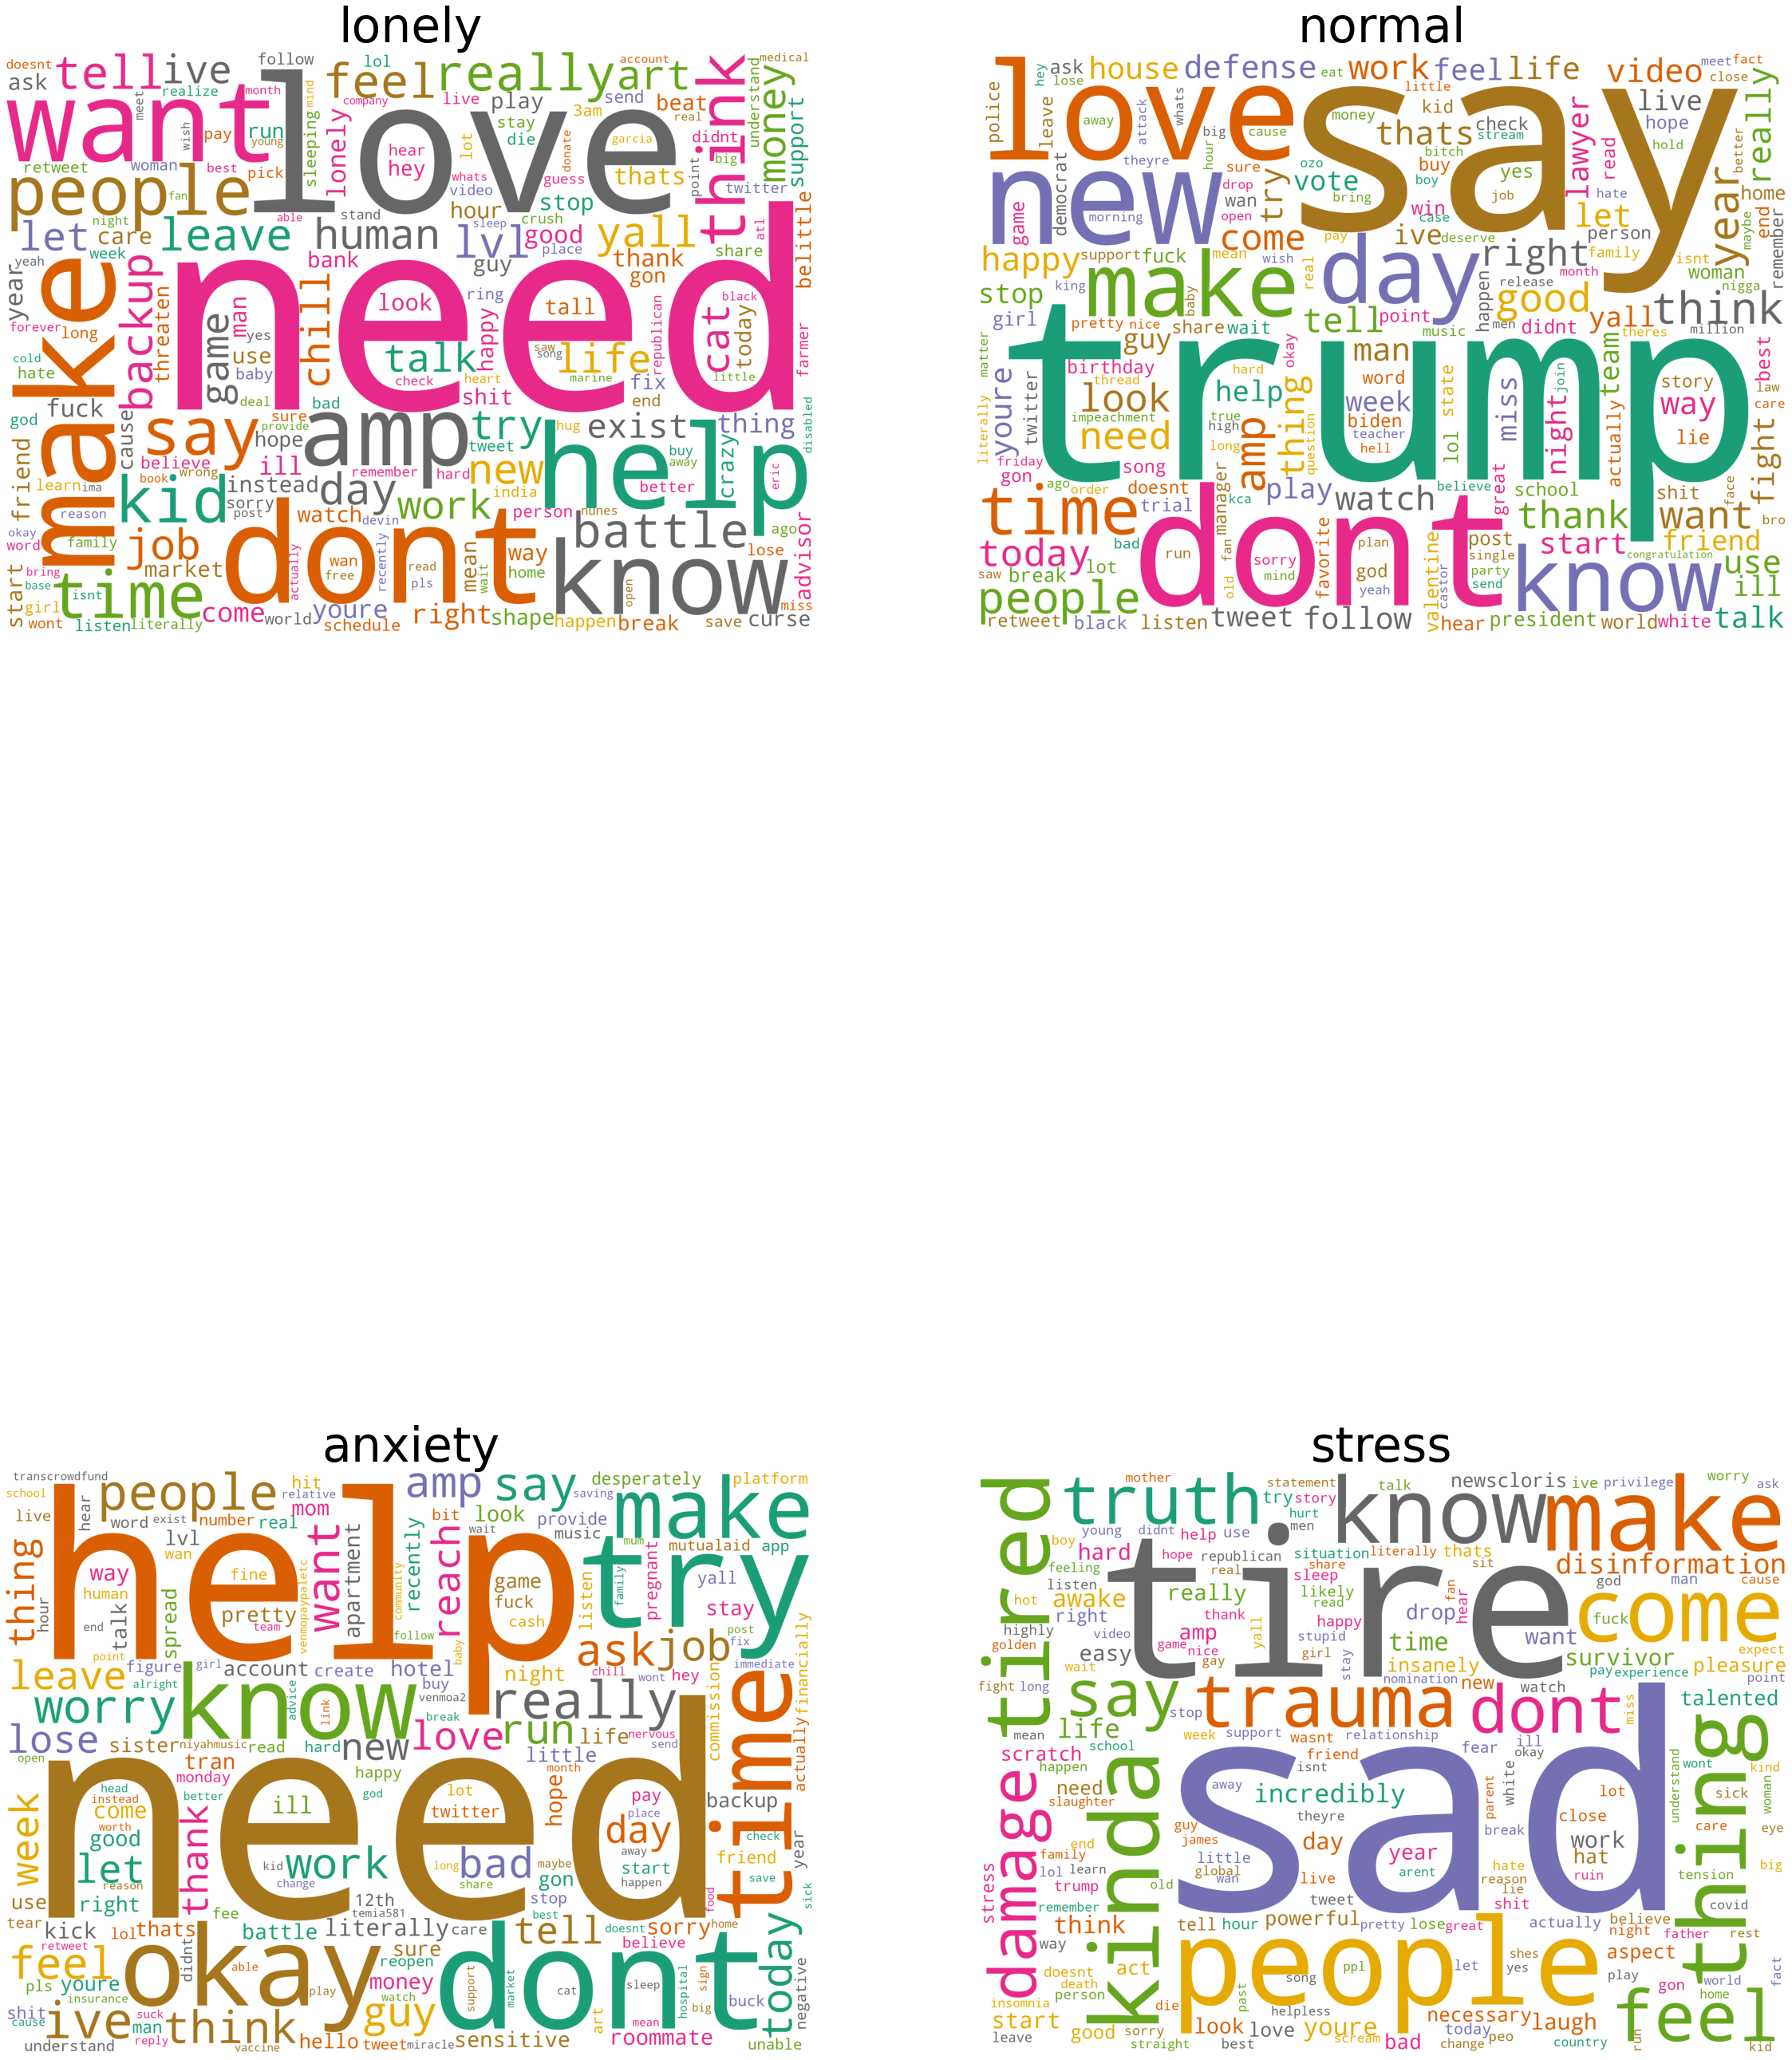

In [23]:
plt.figure(figsize=(40,60))
subset = data[data['class']=='lonely']
text_cleaned = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,1)
plt.axis('off')
plt.title("lonely",fontsize=60)
plt.imshow(cloud1)


subset = data[data['class']=='normal']
text_cleaned = subset.text.values
cloud2 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,2)
plt.axis('off')
plt.title("normal",fontsize=60)
plt.imshow(cloud2)

subset = data[data['class']=='anxiety']
text_cleaned = subset.text.values
cloud3 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,3)
plt.axis('off')
plt.title("anxiety",fontsize=60)
plt.imshow(cloud3)


subset = data[data['class']=='stress']
text_cleaned = subset.text.values
cloud4 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,4)
plt.axis('off')
plt.title("stress",fontsize=60)
plt.imshow(cloud4)


## Split the features and the label to be prepared to used in the classification problem

In [24]:
X = data['text'].values
Y = data['class'].values

## Make vectorization for the features (text column)

In [25]:
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

## Split the data into trainind and test parts by percentage 70% : 30%

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state = 0)

## Start the modeling part

In [27]:
models_results = []

## Start with training and testing the models with the default hyperparameters
Models:

2.   LogisticRegression
3.   LinearSVC
4.   RandomForestClassifier

In [28]:
classifiers = [
    LogisticRegression(solver="sag", random_state=42),
    LinearSVC(random_state=42),
    RandomForestClassifier(random_state=1),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier']


In [ ]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"\n Training classifier: {name}")
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)

    models_results.append({"model": f"{name} TF-IDF", "result": accuracy_score(y_test, prediction)*100})
    print(f'Accuracy for {name}: ', accuracy_score(y_test, prediction))
    report = sklearn.metrics.classification_report(y_test, prediction)
    results[name] = report


 Training classifier: LogisticRegression
Accuracy for LogisticRegression:  0.7489844807832517

 Training classifier: LinearSVC
Accuracy for LinearSVC:  0.7381522758046037

 Training classifier: RandomForestClassifier


In [ ]:
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

In [ ]:
results = pd.DataFrame(models_results).sort_values(by="result")
results

plt.figure(figsize= (12, 8))
plt.title('Machine Learning models results')
ax = sns.barplot(x="model", y= "result", data=results)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

In [42]:
models_results_after_tuned = []

### Hyperparameters tuning for logistic regression

In [44]:
%%time
# feature creation and modelling in a single function using pipeline
pipe = Pipeline([("lr", LogisticRegression())])

# define parameter space to test
params = {
    # parameters for the classifier
    # lr__solver points to lr->solver for the classifier
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
     # lr__penalty points to lr->penalty of the regularization to prevent the overfitting in the model  
    'lr__penalty': ['l2'],
      # lr__C points to lr->C values 
    'lr__C' : [1000, 100, 10, 1.0, 0.1, 0.01]
}
# n_jobs = -1 to work on all virtual processors
# cv = 3 means 3 k folds and 3 times for cross validation by changing each time the validation part
pipe_lr_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="accuracy",verbose=1, cv = 3)
# make fitting for the model to try all combinations created for the hyperparameters
pipe_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits

CPU times: user 2min 13s, sys: 5.37 s, total: 2min 19s

Wall time: 33min 19s


GridSearchCV(cv=3, estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'lr__penalty': ['l2'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [45]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_lr_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_lr_clf.best_score_))

{'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}

best score 0.7552001346542534


In [46]:
# run the pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, y_train)

Pipeline(steps=[('lr', LogisticRegression(solver='newton-cg'))])

In [47]:
prediction = pipe.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, prediction))
models_results_after_tuned.append({"model": "Logistic Regression TF-IDF after tuning", "result": accuracy_score(y_test, prediction)*100})
print('\nClassification Report')
print('======================================================')
print('\n', report)




 Accuracy:  0.7507551296739923



Classification Report




               precision    recall  f1-score   support



     anxiety       0.72      0.72      0.72      3260

      lonely       0.47      0.35      0.40      1495

      normal       0.78      0.90      0.83      3045

      stress       0.93      0.89      0.91      1801



    accuracy                           0.75      9601

   macro avg       0.73      0.71      0.72      9601

weighted avg       0.74      0.75      0.74      9601




### Hyperparameters tuning for LinearSVC



In [48]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

[CV 1/5] END .............................C=0.1;, score=0.759 total time=   0.8s

[CV 2/5] END .............................C=0.1;, score=0.767 total time=   0.8s

[CV 3/5] END .............................C=0.1;, score=0.751 total time=   0.8s

[CV 4/5] END .............................C=0.1;, score=0.749 total time=   0.8s

[CV 5/5] END .............................C=0.1;, score=0.751 total time=   0.8s

[CV 1/5] END ...............................C=1;, score=0.748 total time=   0.9s

[CV 2/5] END ...............................C=1;, score=0.754 total time=   0.9s

[CV 3/5] END ...............................C=1;, score=0.751 total time=   0.9s

[CV 4/5] END ...............................C=1;, score=0.749 total time=   0.9s

[CV 5/5] END ...............................C=1;, score=0.738 total time=   0.9s

[CV 1/5] END ..............................C=10;, score=0.709 total time=   2.5s

[CV 2/5] END ........................

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [49]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1}

LinearSVC(C=0.1)


In [50]:
grid_predictions = grid.predict(X_test)
  
report = sklearn.metrics.classification_report(y_test, grid_predictions)


print('\n Accuracy: ', accuracy_score(y_test, grid_predictions))
models_results_after_tuned.append({"model": "LinearSVM TF-IDF after tuning", "result": accuracy_score(y_test, grid_predictions)*100})

print('\nClassification Report')
print('======================================================')
print('\n', report)



 Accuracy:  0.7546088949067805



Classification Report




               precision    recall  f1-score   support



     anxiety       0.72      0.75      0.74      3260

      lonely       0.51      0.29      0.37      1495

      normal       0.76      0.90      0.83      3045

      stress       0.93      0.89      0.91      1801



    accuracy                           0.75      9601

   macro avg       0.73      0.71      0.71      9601

weighted avg       0.74      0.75      0.74      9601




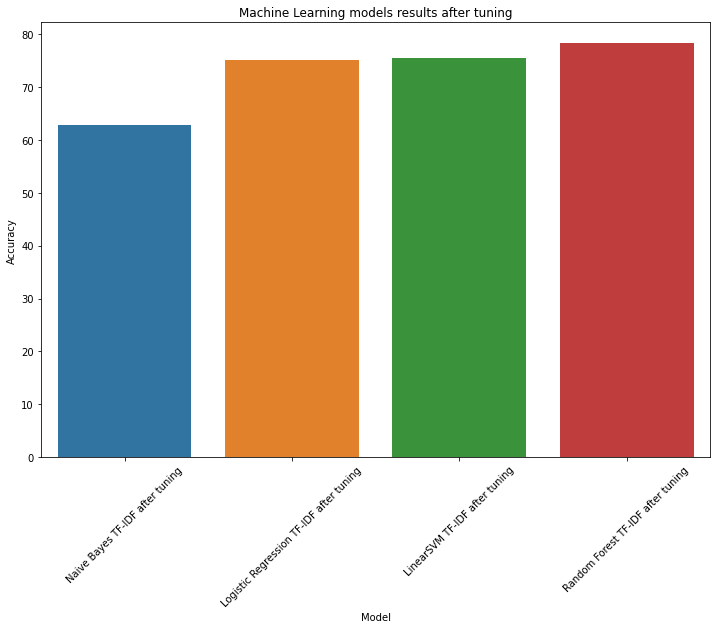

In [55]:
models_results_after_tuned = pd.DataFrame(models_results_after_tuned).sort_values(by="result")
models_results_after_tuned


plt.figure(figsize= (12, 8))
plt.title('Machine Learning models results after tuning')
ax = sns.barplot(x="model", y= "result", data=models_results_after_tuned)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

## RNN models
### First model

In [ ]:
models_DL_results_64 = []
models_DL_results_128 = []

In [ ]:
# encode the labels
y =data['class']
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1,1)

In [ ]:
# tokenize the features (text column)
max_words = 1000

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(data['text'])
X = tok.texts_to_sequences(data['text'])
X = pad_sequences(X,value=0.0)

In [ ]:
# split the data into training and testing parts
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [ ]:
model1 = Sequential()
model1.add(Embedding(500, 120, input_length = X.shape[1]))
model1.add(SpatialDropout1D(0.4))
model1.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(4,activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model1.summary())

In [ ]:
model1.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr1 = model1.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))
models_DL_results_64.append({"model": "LSTM 176", "result": accr1[1]*100})

In [ ]:
model1.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr1 = model1.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))
models_DL_results_128.append({"model": "LSTM 176", "result": accr1[1]*100})

### Second model
using Embedding layer, 2 LSTM layers and 2 Dense layers + output

In [ ]:
model2 = Sequential()
model2.add(Embedding(500,50,input_length=X.shape[1]))

model2.add(LSTM(200, return_sequences=True))
model2.add(LSTM(200))

model2.add(Dense(2000, activation='relu'))
model2.add(Dense(1500, activation='relu'))

model2.add(Dense(4, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model2.summary())

In [ ]:
model2.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr2 = model2.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr2[0],accr2[1]))
models_DL_results_64.append({"model": "2 LSTM 200", "result": accr2[1]*100})

In [ ]:
model2.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr2 = model2.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr2[0],accr2[1]))
models_DL_results_128.append({"model": "2 LSTM 200", "result": accr2[1]*100})

### Third model
using Embedding layer, 1 GRU layer and 5 Dense layer + output

In [ ]:
model3 = Sequential()
model3.add(Embedding(500, 50, input_length=X.shape[1]))

model3.add(GRU(128))

model3.add(Dense(3000, activation='relu'))
model3.add(Dense(2000, activation='relu'))
model3.add(Dense(1000, activation='relu'))
model3.add(Dense(500, activation='relu'))
model3.add(Dense(200, activation='relu'))

model3.add(Dense(4, activation='softmax'))
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model3.summary())

In [ ]:
model3.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr3 = model3.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))
models_DL_results_64.append({"model": "GRU 128", "result": accr3[1]*100})

In [ ]:
model3.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr3 = model3.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))
models_DL_results_128.append({"model": "GRU 128", "result": accr3[1]*100})

### Fourth model
using Embedding layer, 2 GRU layer and 3 Dense layer + output

In [ ]:
model4 = Sequential()
model4.add(Embedding(600, 50, input_length=X.shape[1]))
model4.add(GRU(256, return_sequences=True))
model4.add(GRU(128))

model4.add(Dense(2500, activation='relu'))
model4.add(Dense(2000, activation='relu'))
model4.add(Dense(1000, activation='relu'))

model4.add(Dense(4, activation='softmax'))
model4.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model4.summary())

In [ ]:
model4.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr4 = model4.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))
models_DL_results_64.append({"model": "GRU 256 - GRU 128", "result": accr4[1]*100})

In [ ]:
model4.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr4 = model4.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))
models_DL_results_128.append({"model": "GRU 256 - GRU 128", "result": accr4[1]*100})

### Fifth model
using Embedding layer, 1 GRU layer, 1 LSTM and 3 Dense layer + output

In [ ]:
model5 = Sequential()
model5.add(Embedding(600, 50, input_length=X.shape[1]))

model5.add(GRU(256, return_sequences=True))
model5.add(LSTM(256))

model5.add(Dense(2500, activation='relu'))
model5.add(Dense(2000, activation='relu'))
model5.add(Dense(1000, activation='relu'))

model5.add(Dense(4, activation='softmax'))
model5.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model5.summary())

In [ ]:
model5.fit(X_train, y_train,batch_size=64,epochs=30, verbose = 'auto',validation_split=0.2)
accr5 = model5.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr5[0],accr5[1]))
models_DL_results_64.append({"model": "GRU 256 - LSTM 256", "result": accr5[1]*100})

In [ ]:
model5.fit(X_train, y_train,batch_size=128,epochs=30, verbose = 'auto',validation_split=0.2)
accr5 = model5.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr5[0],accr5[1]))
models_DL_results_128.append({"model": "GRU 256 - LSTM 256", "result": accr5[1]*100})

In [ ]:
models_DL_results_64 = pd.DataFrame(models_DL_results_64).sort_values(by="result")
models_DL_results_64


plt.figure(figsize= (12, 8))
plt.title('Deep Learning models results with batch size = 64')
ax = sns.barplot(x="model", y= "result", data=models_DL_results_64)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

In [ ]:
models_DL_results_128 = pd.DataFrame(models_DL_results_128).sort_values(by="result")
models_DL_results_128


plt.figure(figsize= (12, 8))
plt.title('Deep Learning models results with batch size = 128')
ax = sns.barplot(x="model", y= "result", data=models_DL_results_128)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.xticks(rotation = 45);

# References:
SVM hyperparameter tuning using GRIDSEARCHCV: ML (2022) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ 

T, S.K. (2022) NLP: Sentiment Analysis Using LSTM, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/ 

Learn hyperparameter search wrapper¶ (no date) Scikit. Available at: https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html 